In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0664.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/1269.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0733.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0106.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0375.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/1075.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0285.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0591.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0799.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/1411.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0074.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/1031.jpg
/kaggle/input/autism-image-data/AutismDataset/consolidated/Autistic/0077.jpg

In [2]:
!pip install split_folders

In [3]:
import os
import splitfolders
from tensorflow.keras.preprocessing import image_dataset_from_directory
loc = "/kaggle/input/autism-image-data/AutismDataset/consolidated"
os.makedirs('output', exist_ok=True)
os.makedirs('output/train', exist_ok=True)
os.makedirs('output/val', exist_ok=True)
os.makedirs('output/test', exist_ok=True)
splitfolders.ratio(loc, output="output", seed=42, ratio=(0.80, 0.1, 0.1))

train_dir = "output/train"
test_dir = "output/test"
val_dir = "output/val"

train_data = image_dataset_from_directory(train_dir, batch_size=32, image_size=(224, 224), label_mode='categorical', shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, batch_size=32, image_size=(224, 224), label_mode='categorical', shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, batch_size=32, image_size=(224, 224), label_mode='categorical', shuffle=False, seed=42)

Copying files: 2940 files [00:14, 200.47 files/s]


Found 2352 files belonging to 2 classes.
Found 294 files belonging to 2 classes.
Found 294 files belonging to 2 classes.


In [4]:
import os
import shutil
import splitfolders
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("float32")
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [5]:
from tensorflow.keras.applications import EfficientNetB4, VGG19, NASNetMobile, Xception


Found 2352 files belonging to 2 classes.
Found 294 files belonging to 2 classes.
Found 294 files belonging to 2 classes.
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/60


I0000 00:00:1726107537.316593      83 service.cc:145] XLA service 0x7c65c8013f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726107537.317859      83 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726107537.317945      83 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726107667.319336      83 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 52 bytes spill stores, 52 bytes spill loads

I0000 00:00:1726107667.470193      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.5109 - loss: 1.0821 - val_accuracy: 0.6599 - val_loss: 0.6985
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 25s 337ms/step - accuracy: 0.6015 - loss: 0.8783 - val_accuracy: 0.6803 - val_loss: 0.6718
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 25s 342ms/step - accuracy: 0.6189 - loss: 0.8092 - val_accuracy: 0.6599 - val_loss: 0.6523
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 348ms/step - accuracy: 0.6805 - loss: 0.6912 - val_accuracy: 0.6939 - val_loss: 0.6034
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 355ms/step - accuracy: 0.7079 - loss: 0.6595 - val_accuracy: 0.7075 - val_loss: 0.5868
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 354ms/step - accuracy: 0.7273 - loss: 0.6220 - val_accuracy: 0.7245 - val_loss: 0.5823
Epoch 7/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 355ms/step - accuracy: 0.7364 - loss: 0.5743 - val_accuracy: 0.7381 - val_loss: 0.5735
Epoch 8/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 360ms/step - accuracy: 0.7576 - loss: 0.5521 - val_accuracy: 0.7483 

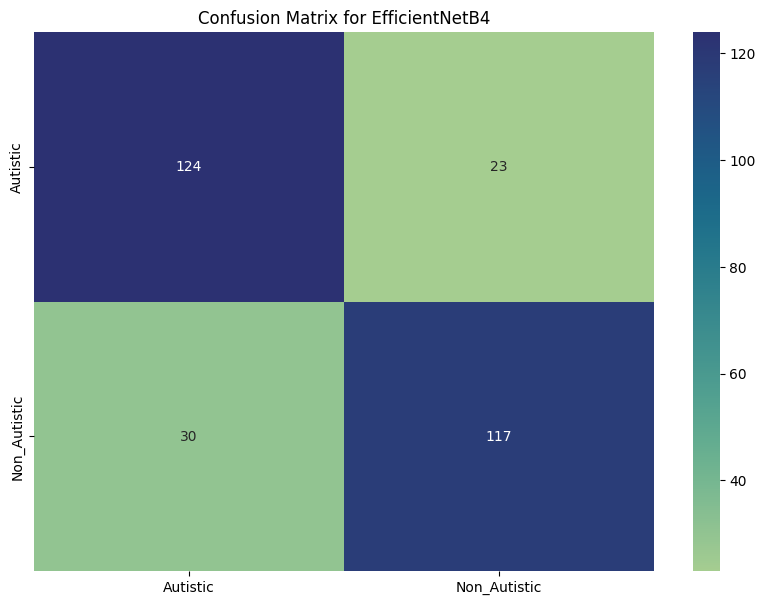

Model saved to /kaggle/working/EfficientNetB4.h5
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 119s 948ms/step - accuracy: 0.5255 - loss: 1.0397 - val_accuracy: 0.7143 - val_loss: 0.7058
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 513ms/step - accuracy: 0.7061 - loss: 0.6594 - val_accuracy: 0.7381 - val_loss: 0.6028
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 510ms/step - accuracy: 0.7809 - loss: 0.4824 - val_accuracy: 0.7755 - val_loss: 0.4785
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 509ms/step - accuracy: 0.8430 - loss: 0.3398 - val_accuracy: 0.8095 - val_loss: 0.4601
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 511ms/step - accuracy: 0.8724 - loss: 0.2915 - val_accuracy: 0.8027 - val_loss: 0.4371
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 511ms/step - accuracy: 0.9040 - loss: 0.2355 - val_accuracy: 0.8163 - val_loss: 0.4144
Epoch 7/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 512ms/step - accuracy: 0.9163 - loss: 0.1983 - val_accuracy: 0.7959 - val_loss: 0.4

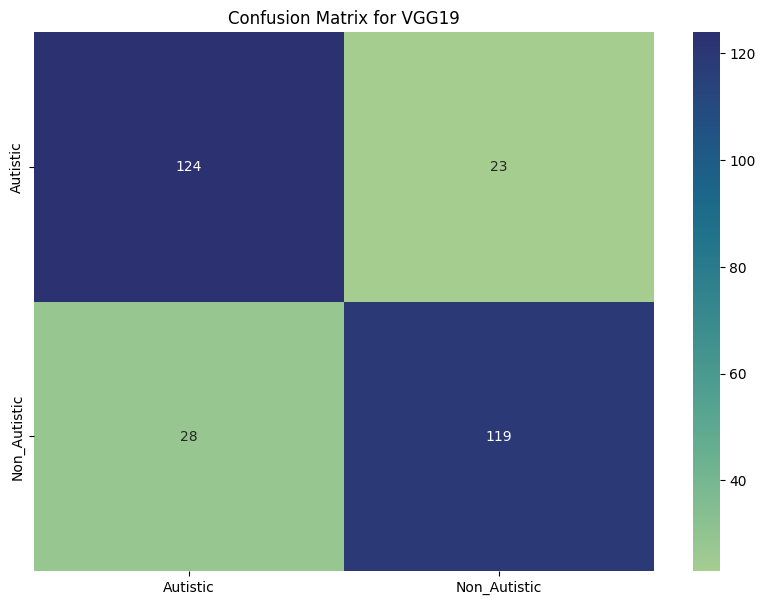

Model saved to /kaggle/working/VGG19.h5
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.5516 - loss: 1.0744 - val_accuracy: 0.5238 - val_loss: 1.2148
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.5910 - loss: 0.9215 - val_accuracy: 0.4830 - val_loss: 1.3601
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 0.6564 - loss: 0.7520 - val_accuracy: 0.4966 - val_loss: 1.3383
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.6702 - loss: 0.7306 - val_accuracy: 0.5000 - val_loss: 1.3943
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.7124 - loss: 0.6071 - val_accuracy: 0.5000 - val_loss: 1.4595
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 215ms/step - accuracy: 0.7544 - loss: 0.5511 - val_accuracy: 0.4966 - val_loss: 1.4720
Epoch 6: early stopping
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7625 - loss: 0.7547
Test Accuracy for NASNetMobile: 0.49659

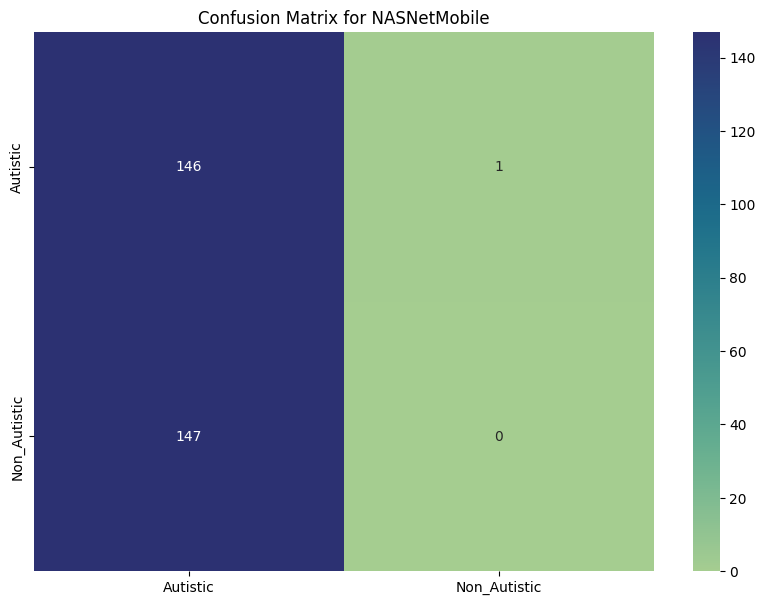

Model saved to /kaggle/working/NASNetMobile.h5
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 118s 838ms/step - accuracy: 0.5314 - loss: 1.1572 - val_accuracy: 0.5306 - val_loss: 0.9944
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 32s 433ms/step - accuracy: 0.6709 - loss: 0.7470 - val_accuracy: 0.6122 - val_loss: 0.7796
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 32s 430ms/step - accuracy: 0.7556 - loss: 0.5696 - val_accuracy: 0.6871 - val_loss: 0.6836
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 444ms/step - accuracy: 0.7863 - loss: 0.4771 - val_accuracy: 0.7075 - val_loss: 0.6548
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 447ms/step - accuracy: 0.8349 - loss: 0.3709 - val_accuracy: 0.7211 - val_loss: 0.6252
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 441ms/step - accuracy: 0.8622 - loss: 0.2971 - val_accuracy: 0.7279 - val_loss: 0.6135
Epoch 7/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 443ms/step - accuracy: 0.8924 - loss: 0.2710 - val_accuracy: 0.7279 - val_loss: 0.614

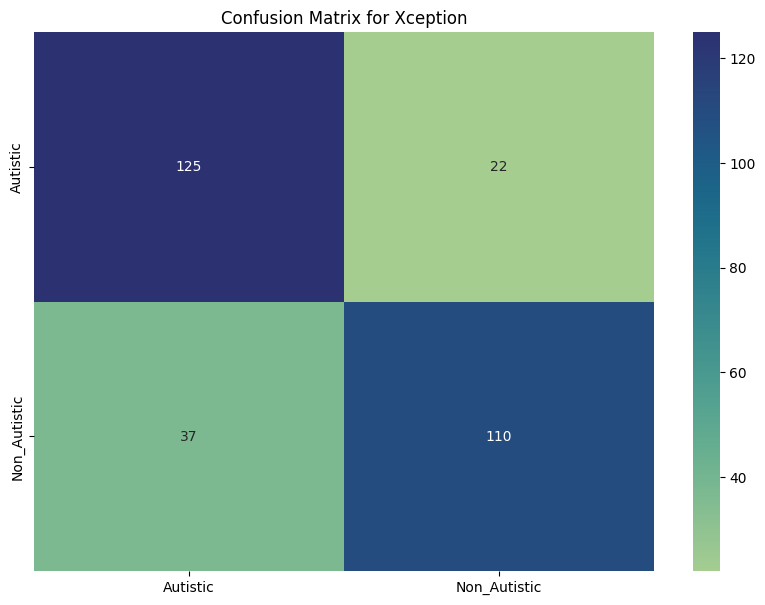

Model saved to /kaggle/working/Xception.h5


In [6]:

dim=224
def create_model(model_name):
    input_shape = (dim, dim, 3)
    base_model = None
    
    if model_name == 'EfficientNetB4':
        base_model = EfficientNetB4(include_top=False, weights="imagenet", input_shape=input_shape, pooling='max')
    elif model_name == 'VGG19':
        base_model = VGG19(include_top=False, weights="imagenet", input_shape=input_shape, pooling='max')
    elif model_name == 'NASNetMobile':
        base_model = NASNetMobile(include_top=False, weights="imagenet", input_shape=input_shape, pooling='max')
    elif model_name == 'Xception':
        base_model = Xception(include_top=False, weights="imagenet", input_shape=input_shape, pooling='max')

    x = base_model.output
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.002)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.45, seed=42)(x)
    output = Dense(class_count, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
def train_and_evaluate_model(model, train_data, val_data, test_data, model_name):
    early_stopper = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)
    history = model.fit(train_data, epochs=60, validation_data=val_data, callbacks=[early_stopper])

    test_loss, test_accuracy = model.evaluate(test_data)
    print(f"Test Accuracy for {model_name}:", test_accuracy)

    test_data_array = []
    labels_array = []
    for images, labels in test_data:
        test_data_array.append(images.numpy())
        labels_array.append(labels.numpy())

    X_test = np.concatenate(test_data_array, axis=0)
    y_test = np.concatenate(labels_array, axis=0)

    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = tf.keras.utils.to_categorical(y_pred, num_classes=2)

    print(classification_report(y_test, y_pred))

    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, cmap='crest', annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    save_path = f"/kaggle/working/{model_name}.h5"
    model.save(save_path)
    print(f"Model saved to {save_path}")



train_data = image_dataset_from_directory(train_dir, batch_size=32, image_size=(dim, dim), label_mode='categorical', shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, batch_size=32, image_size=(dim, dim), label_mode='categorical', shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, batch_size=32, image_size=(dim, dim), label_mode='categorical', shuffle=False, seed=42)

class_names = train_data.class_names
class_count = len(class_names)
model_names = ['EfficientNetB4', 'VGG19', 'NASNetMobile', 'Xception']

for model_name in model_names:
    model = create_model(model_name)
    train_and_evaluate_model(model, train_data, val_data, test_data, model_name)